In [ ]:
import keras
keras.__version__

'2.9.0'

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import trange
import random

In [ ]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
import os

data_dir = '/content/drive/MyDrive/2_6lstm'
fname = os.path.join(data_dir, '13.csv')

with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['Datetime', 'Score']
45


In [ ]:
print(x)

In [ ]:
print(lines)

['2021-02-16,82', '2021-02-17,63', '2021-02-18,78', '2021-02-22,80', '2021-02-23,80', '2021-02-25,73', '2021-03-14,98', '2021-03-26,87', '2021-03-28,62', '2021-04-13,65', '2021-04-25,74', '2021-05-06,76', '2021-05-10,85', '2021-05-11,72', '2021-05-12,74', '2021-05-13,82', '2021-05-14,75', '2021-05-15,58', '2021-05-16,77', '2021-05-19,100', '2021-05-20,80', '2021-05-21,84', '2021-05-24,80', '2021-05-25,97', '2021-05-26,84', '2021-05-28,84', '2021-05-31,95', '2021-06-01,97', '2021-06-03,89', '2021-06-04,79', '2021-06-08,80', '2021-06-10,100', '2021-06-11,80', '2021-06-12,92', '2021-06-14,90', '2021-06-15,93', '2021-06-16,54', '2021-06-17,87', '2021-06-18,91', '2021-06-20,67', '2021-06-21,50', '2021-06-23,58', '2021-06-24,50', '2021-06-25,85', '2021-06-26,76']


In [ ]:
import numpy as np
Score = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    #values = [float(x[1:3]) for x in line.split(",")[1:]]
    for x in line.split(",")[1:]:
      values = float(x[x.find(''')+1:x.rfind(''')]) 
    Score[i] = values
    raw_data[i, :] = values#[:]

In [ ]:
from matplotlib import pyplot as plt

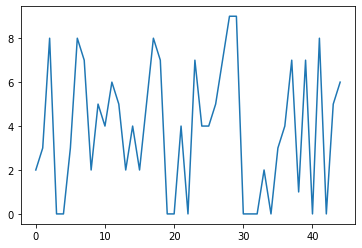

In [ ]:
plt.plot(Score[:])
plt.show()

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 22
num_val_samples: 11
num_test_samples: 12


In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [ ]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  # There is no graph to add in eager mode.


data: 선택 대상 데이터셋 전체

targets: 선택 대상 데이터셋 전체

sampling_rate: 표본 비율. 몇 개 중에 하나를 선택할 것인지 지정.

sequence_length: 시퀀스 샘플 길이

shuffle=True: 생성된 시퀀스들의 순서를 무작위하게 섞음.

batch_size: 배치 크기. 생성된 시퀀스들을 배치로 묶음.

start_index: 표본 추출 대상 시작 구간

end_index: 표본 추출 대상 끝 구간

In [ ]:
sampling_rate = 1
sequence_length = 8
delay = sampling_rate * (sequence_length )
batch_size = 2

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=Score[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=Score[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=Score[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [ ]:
for samples, targets in train_dataset:
    print("샘플 모양:", samples.shape)
    print("타깃 모양:", targets.shape)
    break

샘플 모양: (2, 8, 1)
타깃 모양: (2,)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"],run_eagerly=True)
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
8/8 [==============================] - 0s 25ms/step - loss: 20.2617 - mae: 3.8139 - val_loss: 0.4124 - val_mae: 0.5031
Epoch 2/10
8/8 [==============================] - 0s 23ms/step - loss: 19.5436 - mae: 3.7231 - val_loss: 0.3671 - val_mae: 0.4801
Epoch 3/10
8/8 [==============================] - 0s 23ms/step - loss: 18.9980 - mae: 3.6581 - val_loss: 0.3472 - val_mae: 0.4690
Epoch 4/10
8/8 [==============================] - 0s 23ms/step - loss: 18.5284 - mae: 3.6010 - val_loss: 0.3335 - val_mae: 0.4873
Epoch 5/10
8/8 [==============================] - 0s 21ms/step - loss: 18.0835 - mae: 3.5463 - val_loss: 0.3360 - val_mae: 0.5057
Epoch 6/10
8/8 [==============================] - 0s 21ms/step - loss: 17.6714 - mae: 3.4983 - val_loss: 0.3628 - val_mae: 0.5319
Epoch 7/10
8/8 [==============================] - 0s 21ms/step - loss: 17.2442 - mae: 3.4465 - val_loss: 0.4018 - val_mae: 0.5564
Epoch 8/10
8/8 [==============================] - 0s 22ms/step - loss: 16.8341 - mae: 3.40

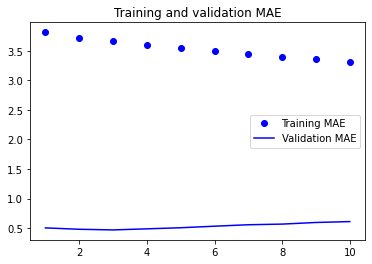

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"],run_eagerly=True)
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
8/8 [==============================] - 0s 27ms/step - loss: 18.3688 - mae: 3.5516 - val_loss: 0.9014 - val_mae: 0.6679
Epoch 2/10
8/8 [==============================] - 0s 26ms/step - loss: 17.7812 - mae: 3.4973 - val_loss: 0.8735 - val_mae: 0.7225
Epoch 3/10
8/8 [==============================] - 0s 28ms/step - loss: 17.2071 - mae: 3.4500 - val_loss: 0.8716 - val_mae: 0.7965
Epoch 4/10
8/8 [==============================] - 0s 26ms/step - loss: 16.4997 - mae: 3.3825 - val_loss: 0.9012 - val_mae: 0.8802
Epoch 5/10
8/8 [==============================] - 0s 27ms/step - loss: 15.6721 - mae: 3.3047 - val_loss: 0.9773 - val_mae: 0.9652
Epoch 6/10
8/8 [==============================] - 0s 25ms/step - loss: 14.6939 - mae: 3.2101 - val_loss: 1.1599 - val_mae: 1.0744
Epoch 7/10
8/8 [==============================] - 0s 29ms/step - loss: 13.4771 - mae: 3.0729 - val_loss: 1.5514 - val_mae: 1.2147
Epoch 8/10
8/8 [==============================] - 0s 27ms/step - loss: 12.0828 - mae: 2.91

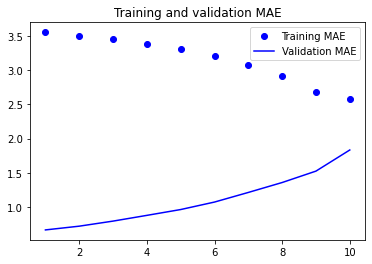

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# 훈련 속도를 놓이기 위해 순환 드롭아웃을 제외합니다.
#x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.LSTM(32)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"],run_eagerly=True)
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/50
8/8 [==============================] - 0s 28ms/step - loss: 18.6749 - mae: 3.5828 - val_loss: 0.8853 - val_mae: 0.6002
Epoch 2/50
8/8 [==============================] - 0s 28ms/step - loss: 17.9133 - mae: 3.5142 - val_loss: 0.8391 - val_mae: 0.6955
Epoch 3/50
8/8 [==============================] - 0s 26ms/step - loss: 16.8762 - mae: 3.4197 - val_loss: 0.8525 - val_mae: 0.8482
Epoch 4/50
8/8 [==============================] - 0s 26ms/step - loss: 15.4913 - mae: 3.2869 - val_loss: 1.0703 - val_mae: 1.0306
Epoch 5/50
8/8 [==============================] - 0s 27ms/step - loss: 13.6124 - mae: 3.0958 - val_loss: 1.6723 - val_mae: 1.2470
Epoch 6/50
8/8 [==============================] - 0s 27ms/step - loss: 11.6767 - mae: 2.8403 - val_loss: 3.7174 - val_mae: 1.7045
Epoch 7/50
8/8 [==============================] - 0s 30ms/step - loss: 10.1714 - mae: 2.5746 - val_loss: 4.8822 - val_mae: 2.0234
Epoch 8/50
8/8 [==============================] - 0s 27ms/step - loss: 9.3896 - mae: 2.597

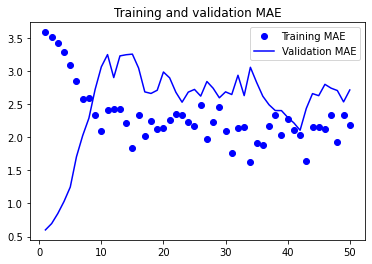

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [ ]:
def train_generator():
    while True:
        for samples, targets in train_dataset:
            yield samples[:, ::-1, :], targets

def val_generator():
    while True:
        for samples, targets in val_dataset:
            yield samples[:, ::-1, :], targets
        
train_gen = train_generator()
val_gen = val_generator()

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# 훈련 속도를 놓이기 위해 순환 드롭아웃을 제외합니다.
# x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.LSTM(32)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"],run_eagerly=True)
history = model.fit(train_gen,
                    epochs=10,
                    steps_per_epoch=819,
                    validation_data=val_gen,
                    validation_steps=410)

Epoch 1/10
819/819 [==============================] - 27s 33ms/step - loss: 7.4030 - mae: 2.2745 - val_loss: 4.5002 - val_mae: 2.0167
Epoch 2/10
819/819 [==============================] - 26s 32ms/step - loss: 5.4169 - mae: 1.9493 - val_loss: 1.2376 - val_mae: 0.7065
Epoch 3/10
819/819 [==============================] - 26s 32ms/step - loss: 3.7778 - mae: 1.6414 - val_loss: 1.9052 - val_mae: 1.1970
Epoch 4/10
819/819 [==============================] - 47s 58ms/step - loss: 2.6068 - mae: 1.2890 - val_loss: 2.7004 - val_mae: 1.5793
Epoch 5/10
819/819 [==============================] - 26s 32ms/step - loss: 1.7388 - mae: 1.0079 - val_loss: 1.3872 - val_mae: 1.1347
Epoch 6/10
819/819 [==============================] - 27s 32ms/step - loss: 1.1866 - mae: 0.8214 - val_loss: 0.9019 - val_mae: 0.8874
Epoch 7/10
819/819 [==============================] - 26s 32ms/step - loss: 1.0783 - mae: 0.7826 - val_loss: 0.6853 - val_mae: 0.7275
Epoch 8/10
819/819 [==============================] - 26s 31ms

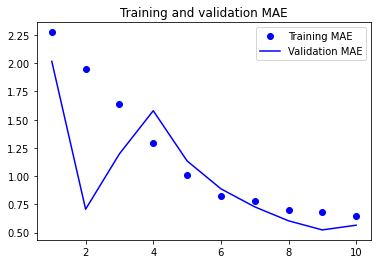

In [ ]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

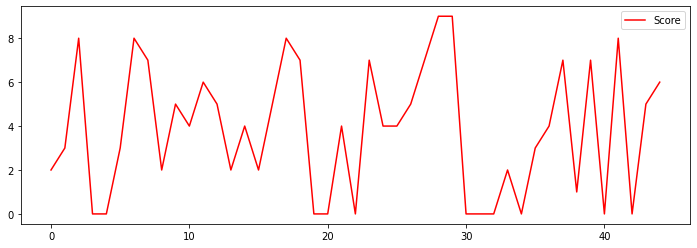

In [ ]:
fig = plt.figure(figsize = (12, 4))
chart = fig.add_subplot(1,1,1)
chart.plot(Score, color='red' , label='Score')
plt.legend(loc = 'best')

In [ ]:
history.history

{'loss': [7.402995586395264,
  5.4168620109558105,
  3.7777671813964844,
  2.6067607402801514,
  1.73878812789917,
  1.1865565776824951,
  1.0783365964889526,
  0.8854295611381531,
  0.8230340480804443,
  0.7317196726799011],
 'mae': [2.274541139602661,
  1.9493203163146973,
  1.6414388418197632,
  1.2889984846115112,
  1.0078635215759277,
  0.8213843107223511,
  0.7826030850410461,
  0.7034069299697876,
  0.6803202033042908,
  0.644504964351654],
 'val_loss': [4.5001630783081055,
  1.2376165390014648,
  1.9051566123962402,
  2.7003843784332275,
  1.3872485160827637,
  0.9018958210945129,
  0.6853113174438477,
  0.5380609631538391,
  0.4677491784095764,
  0.5323527455329895],
 'val_mae': [2.0166521072387695,
  0.7065472602844238,
  1.1970335245132446,
  1.5792566537857056,
  1.1346718072891235,
  0.8874431252479553,
  0.7275310158729553,
  0.6038438081741333,
  0.5231645703315735,
  0.5650840401649475]}

In [ ]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 8, 1)]            0         
                                                                 
 lstm_11 (LSTM)              (None, 32)                4352      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('/content/jena_lstm_dropout.keras')

In [ ]:
tf.config.experimental_run_functions_eagerly

<function tensorflow.python.eager.def_function.experimental_run_functions_eagerly(run_eagerly)>

In [ ]:
tf.data.experimental.enable_debug_mode()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Lasso
import numpy as np

In [ ]:
model.predict([[0]])

1/1 [==============================] - 0s 27ms/step


array([[1.1059599]], dtype=float32)